Importación de librerias y scripts.

In [12]:
from pickle import load
from pandas import DataFrame, concat
from cleaning import chisq_matrix, delete_underwhelming

root = "../../picklesClass/"

In [13]:
with open( root + 'ClassBase.pkl', 'rb' ) as f:
    Numerical = load(f)
    Categorical = load(f)

y = Numerical['isFraud']
Categorical = delete_underwhelming( Categorical )

# Parte 1: Limpieza de los datos

En primer lugar cabe aclarar que los datos faltantes para cada variable se rellenaron con sus respectivas modas o medias según la naturaleza de la variable. En el caso de las categóricas, se omitieron aquellas variables cuyo porcentaje de datos faltantes superaba el 20%, ya que reemplazar estos datos faltantes por la moda podría llegar 

Para las variables continuas se usó el script provisto en el archivo `cleaning.py`, que consiste en dos fases de eliminación en base al mayor VIF en caso que este sea superior a 10 o 5. La primera fase ubica las dos variables independientes más correlacionadas entre sí y elimina aquella con mayor VIF en caso que supere el valor de 10. Este proceso para en el momento que la mayor correlación sea inferior a 0.5, despues de esto, se ejecuta la eliminación simple por VIF en el mayor de todos hasta que el mayor de los VIF sea inferior a 105. En últimas, esto garantiza una multicolinealidad extremadamente baja. 

Por otro lado, la eliminación en las variables categóricas se realizó mediante una prueba de contingencia de $\chi^2$, específicamente, se usó una matriz para visualizar el p-valor arrojado por la prueba entre las variables. Se pueden ver los resultados mencionados en la siguiente tabla:

In [14]:
chisq_matrix( concat( [ DataFrame( y, columns=['isFraud'] ), Categorical ], axis=1 ) )

,isFraud,ProductCD,card4,card6,P_emaildomain
isFraud,0.000000e+00,0.0,7.129275e-79,0.0,0.0
ProductCD,0.000000e+00,0.0,0.000000e+00,0.0,0.0
card4,7.129275e-79,0.0,0.000000e+00,0.0,0.0
card6,0.000000e+00,0.0,0.000000e+00,0.0,0.0
P_emaildomain,0.000000e+00,0.0,0.000000e+00,0.0,0.0


Es evidente que todas estas variables están fuertemente correlacionadas tanto entre sí mismas, como con la variable respuesta, por lo que es sufiente tomar una de estas para los modelos. En este caso se tomará la variable `ProductCD`, ya que no presentó datos faltantes (Esto se probará más adelante).

### Procentaje de datos faltantes

A continuación se pueden ver el porcentaje de los datos faltantes para las variables seleccionadas.

In [16]:
from pandas import merge, read_csv, DataFrame
DataMissing = merge(read_csv(root + 'train_transaction.csv'), read_csv(root + 'train_identity.csv'), on='TransactionID', how='left')[[ 
    'isFraud', 'C1', 'C3', 'C5', 'D1', 'D3', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 
    'ProductCD', "V142", "V141", "V138", "V135", "V131", "V130", "V12", "V104",
    "V101", "V100", "V10", "TransactionAmt", "D9", "D8", "D7", "D5", "D4" ]]

Miss = DataFrame((DataMissing.isnull().sum() / DataMissing.shape[0])*100, columns=['%'])
Miss[ Miss['%'] >= 20 ].T.style.set_caption('Porcentaje de datos faltantes mayor o igual al 20%')

,D3,D11,D12,D13,D14,V142,V141,V138,V10,D9,D8,D7,D5,D4
%,44.514851,47.293494,89.041047,89.509263,89.469469,86.123717,86.123717,86.123717,47.293494,87.312290,87.312290,93.409930,52.467403,28.604667


Como se puede ver en la tabla, gran parte de las variables elegidas al final, tienen un porcentaje de datos faltantes mayor al 20%. Para mantener el sentido del modelo, es mejor eliminar estas variables, ya que gran parte se reemplazará por la media, lo que puede llegar a generar datos irrelevantes para los modelos. Finalmente, los datos independientes quedan de la siguiente manera:

In [17]:
with open( root + "ClassData.pkl", 'rb' ) as f:
    y = load(f)
    X = load(f)
X

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,C1,C3,C5,D1,D10,D15,V135,V131,V130,V12,V104,V101,V100,TransactionAmt
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,14.0,13.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,68.50
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,29.00
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,315.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,59.00
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,112.0,84.000000,111.000000,0.000000,135.0,354.000000,1.000000,0.0,1.0,4.0,50.00
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,123.982137,163.744579,0.000000,0.0,0.000000,0.559711,0.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,29.0,56.000000,56.000000,0.000000,0.0,47.950001,2.000000,0.0,0.0,0.0,49.00
590536,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,39.50
590537,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,30.95
590538,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,22.000000,22.000000,0.000000,117.0,117.000000,1.000000,0.0,0.0,1.0,117.00


# Parte 2: Análisis exploratorio de los datos

### Variable dependiente

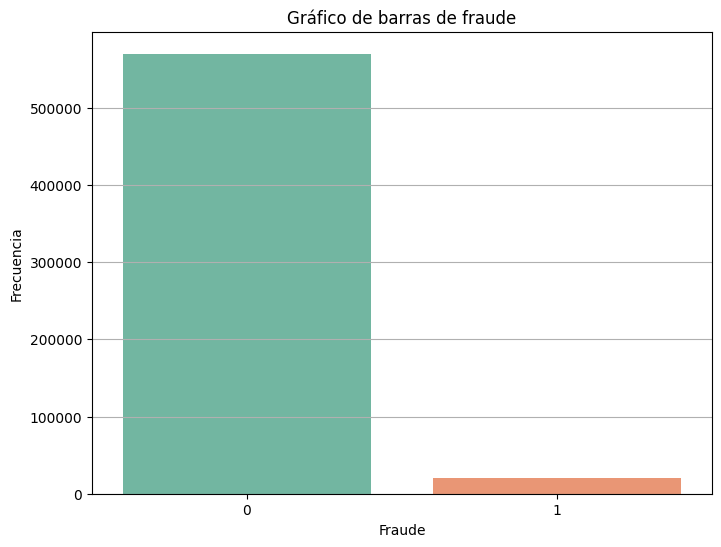

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

y_df = pd.DataFrame(y, columns=['isFraud'])

value_counts = y_df['isFraud'].value_counts()

value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=value_counts_df, palette='Set2')
plt.title('Gráfico de barras de fraude')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')
plt.show()

Como se puede ver en la gráfica, la variable `isFraud` cuenta con un total de 569877 (97%) de transacciones lícitas, por lo que puede ser problemático para la generación de modelos sin una forma de balancear la desproporción. 

### `ProductCD`

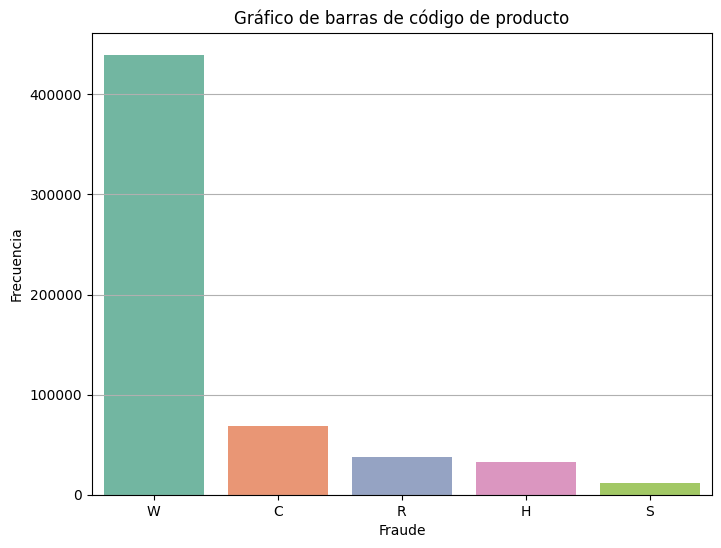

In [20]:
value_counts = Categorical['ProductCD'].value_counts()

value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=value_counts_df, palette='Set2')
plt.title('Gráfico de barras de código de producto')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')
plt.show()

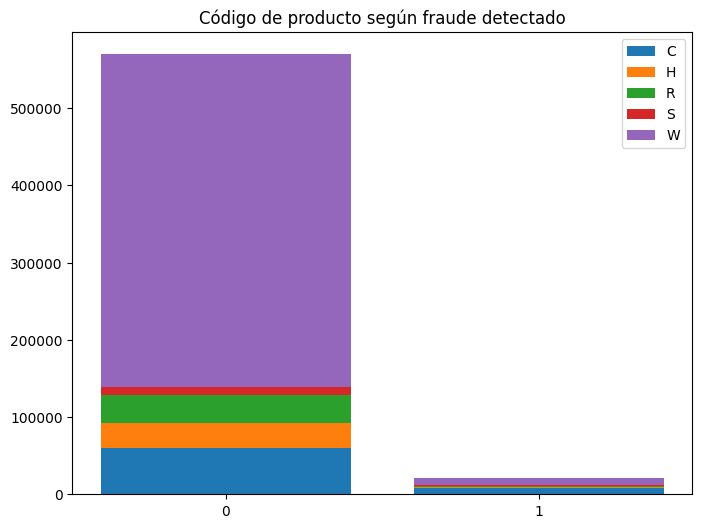

In [22]:
from pandas import crosstab
from numpy import zeros, array, append

eda_df = concat( [ y_df, Categorical ], axis = 1 )

cross_table = crosstab( eda_df['isFraud'], eda_df['ProductCD'] )

ct = dict()
cross_dict = cross_table.to_dict()
for key in cross_dict:
    item = array([])
    for sub_key in cross_dict[ key ]: item = append( item, cross_dict[ key ][ sub_key ] )
    ct[ key ] = item

isFraud = ( '0', '1' )

fig, ax = plt.subplots(figsize=(8, 6))
bottom = zeros(2)

for boolean, count in ct.items():
    p = ax.bar(isFraud, count, label=boolean, bottom=bottom )
    bottom += count
ax.set_title("Código de producto según fraude detectado")
ax.legend(loc="upper right")

plt.show()

## Variables contínuas

Se puede observar el resumen de las variables en la siguiente tabla

In [23]:
X.drop( columns = [ 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W' ] ).describe()

,C1,C3,C5,D1,D10,D15,V135,V131,V130,V12,V104,V101,V100,TransactionAmt
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,0.005644,5.571526,94.347568,123.982137,163.744579,17.250132,31.133302,92.165849,0.559711,0.085433,0.889249,0.273504,135.027176
std,133.569018,0.150536,25.786976,157.490898,170.456102,186.805646,293.769431,161.118406,315.876473,0.476516,0.648545,20.577098,0.946924,239.162522
min,0.000000,0.000000,0.000000,0.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.321000
50%,1.000000,0.000000,0.000000,3.000000,43.000000,117.000000,0.000000,0.000000,0.000000,0.559711,0.000000,0.000000,0.000000,68.769000
75%,3.000000,0.000000,1.000000,121.000000,150.000000,251.000000,0.000000,0.000000,59.000000,1.000000,0.000000,0.000000,0.000000,125.000000
max,4685.000000,26.000000,349.000000,640.000000,876.000000,879.000000,90750.000000,55125.000000,55125.000000,3.000000,15.000000,869.000000,28.000000,31937.391000


Es evidente que para la mayoria de variables, la desviación estándar es mucho más alta que la media, por lo que los datos van a estar extremadamente dispersos. Más aún, Todos los máximos son extremadamente altos, mucho más que el tercer cuartil, por tanto se evidencian datos extremadamente atípicos. También es notable la diferencia entre la media y la mediana, lo que implica que todas las variables tienen una severa asimetría.

### `TransactionAmt`

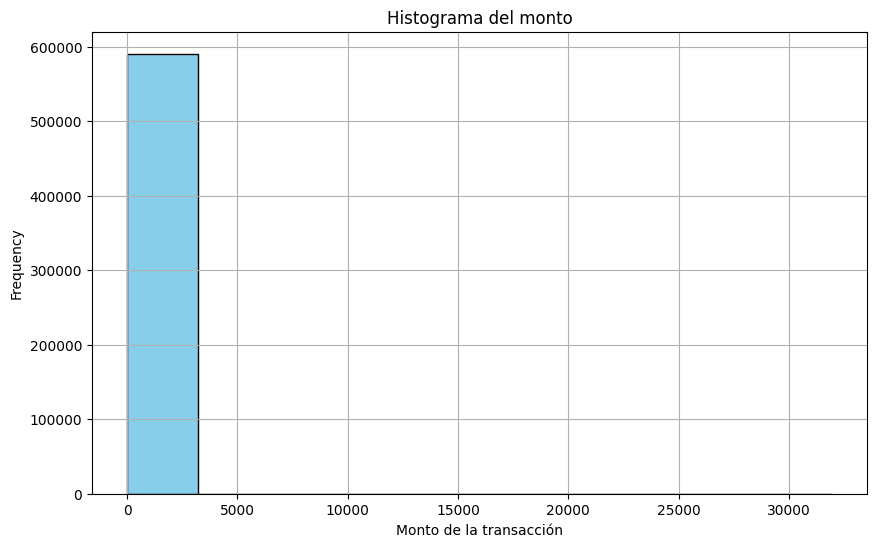

In [24]:
transaction_amt_values = X['TransactionAmt']

plt.figure(figsize=(10, 6))
plt.hist(transaction_amt_values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma del monto')
plt.xlabel('Monto de la transacción')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Es notable que casi el total de los datos se encuentra en el primer intérvalo inferior a 5000, además el tamaño del intérvalo implica la existencia de uno o más datos atípicos extremadamente altos.

In [25]:
eda_df = concat( [eda_df, X], axis = 1 )

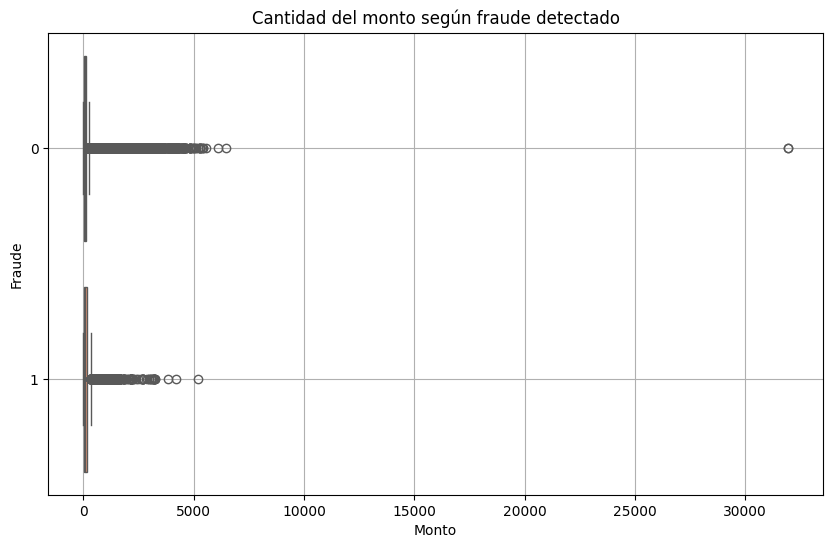

In [26]:
eda_df['isFraud'] = eda_df['isFraud'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionAmt', y='isFraud', data=eda_df, palette='Set2' )
plt.title('Cantidad del monto según fraude detectado')
plt.xlabel('Monto')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Como se mencionó previamente, se encuentra un dato extremádamente atípico. Podemos ver que hay una tendencia para las transacciones lícitas en alcanzar valores más altos, aún así, no se pueden sacar muchas conclusiones dada la desproporción de los datos.

### `C1`

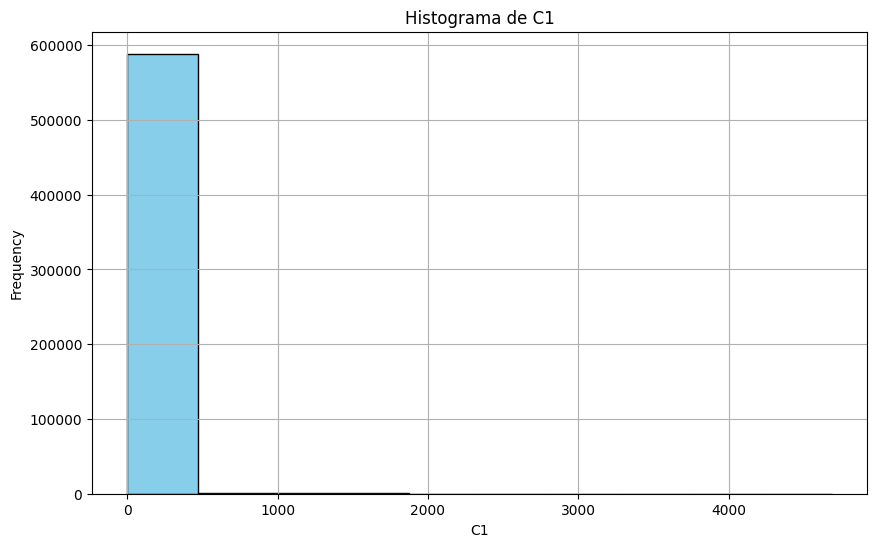

In [27]:
values = X['C1']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de C1')
plt.xlabel('C1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Así como en la variable anterior, se encuentra una asimetría extrema. Esto se debe especialmente al hecho que el 75% de los datos es menor o igual a 3, mientras que hay un rango extremadamente amplio.

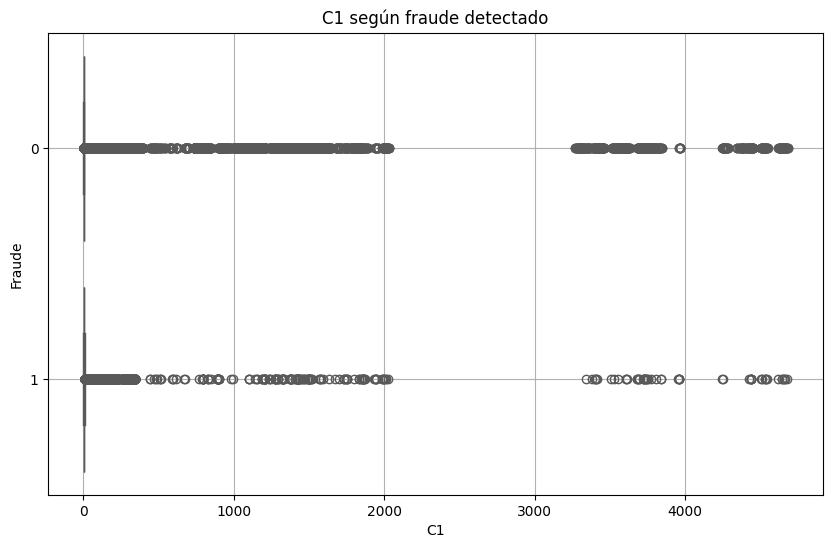

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='C1', y='isFraud', data=eda_df, palette='Set2' )
plt.title('C1 según fraude detectado')
plt.xlabel('C1')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

En este caso tambien es evidente que hay mayor concentración de datos atípicos en el conjunto lícito dada la disparidad, pero se puede ver claramente que ambas mantienen cierta similitud. Como se pudo ver en la tabla descriptiva, la gran mayoria de las variables se concentran en el intérvalo de 0-3.

### `C3`

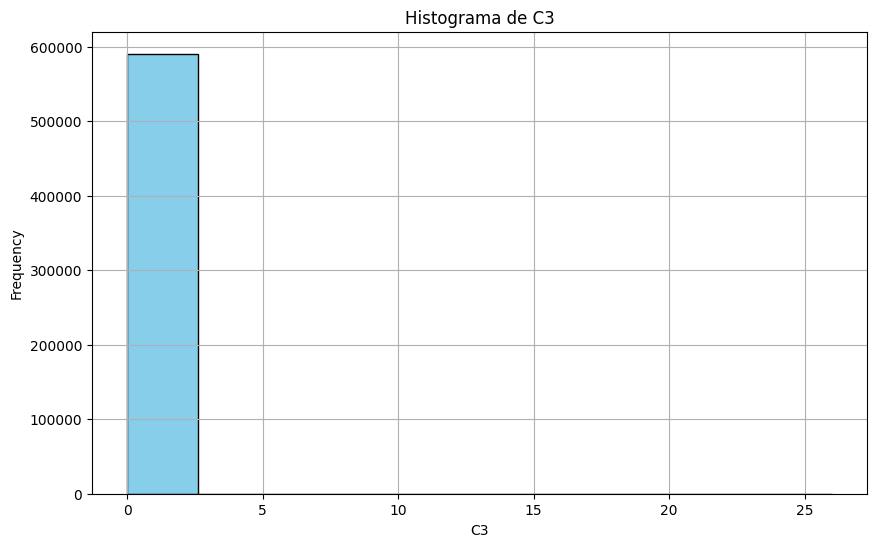

In [29]:
values = X['C3']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de C3')
plt.xlabel('C3')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Es notorio que no se puede apreciar ningún valor por fuera del intérvalo marcado, por lo que como el resto de variables, es evidencia de muchos datos atípicos.

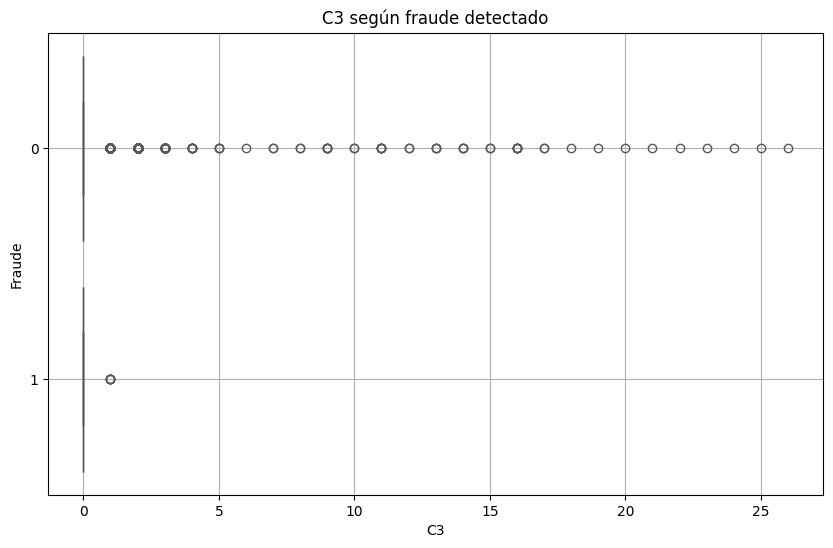

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='C3', y='isFraud', data=eda_df, palette='Set2' )
plt.title('C3 según fraude detectado')
plt.xlabel('C3')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Como se menciona antes, la mayoria de datos se concentra en el valor de 0, aún así, se presentan unos cuantos datos atípicos en la parte lícita de las transacciones.

### `C5`

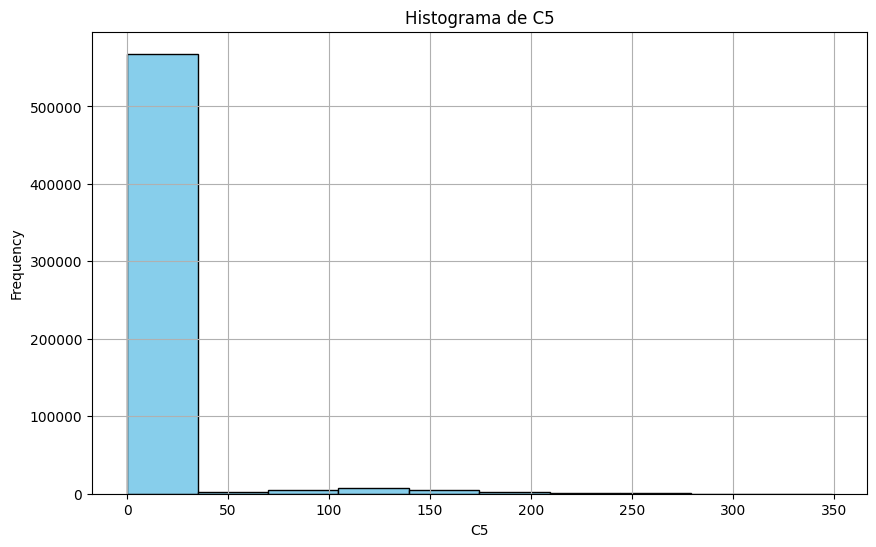

In [31]:
values = X['C5']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de C5')
plt.xlabel('C5')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A diferencia de las variables anteriores, esta sí permite observar unos cuantos valores por fuera de los valores iniciales, aún así, mantiene el patrón previo de una concentración de datos extrema al inicio del intérvalo.

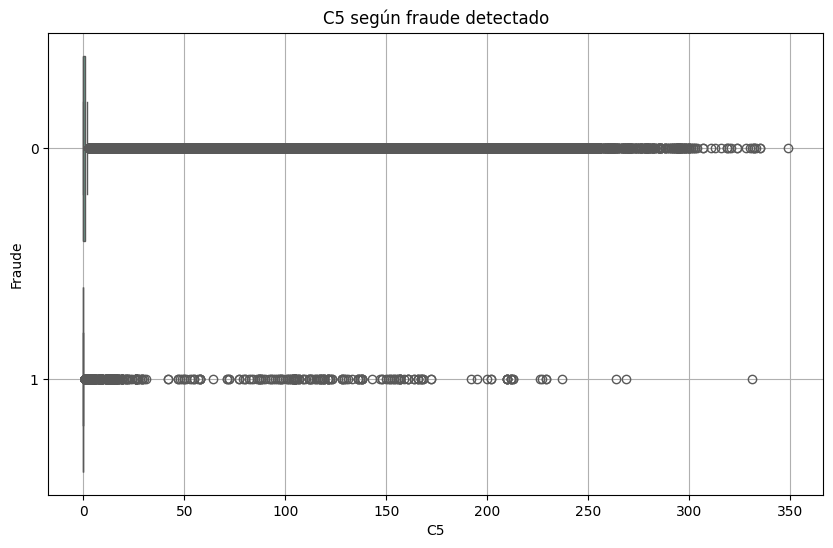

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='C5', y='isFraud', data=eda_df, palette='Set2' )
plt.title('C5 según fraude detectado')
plt.xlabel('C5')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Por otro lado, podemos observar una ligera diferencia más marcada entre los casos de fraude, ya que las transacciones lícitas tienen en general datos atípicos mayores que los de las transacciones marcadas como fraude.

### `D1`

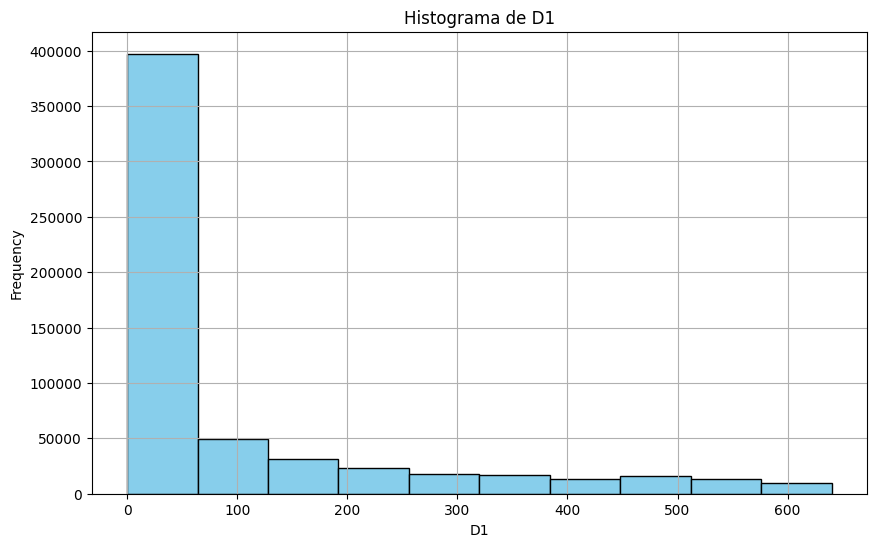

In [33]:
values = X['D1']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de D1')
plt.xlabel('D1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

De forma similar a la variable anterior, a pesar de tener datos atípicos, es evidente que la variable posee una distribución más cercana al origen.

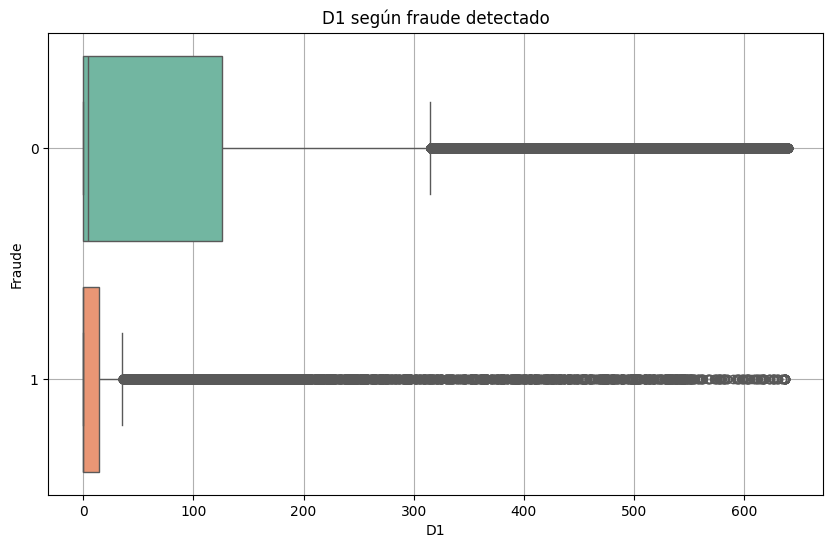

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='D1', y='isFraud', data=eda_df, palette='Set2' )
plt.title('D1 según fraude detectado')
plt.xlabel('D1')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Es evidente que las transacciones lícitas tienen tendencia a poseer un valor mayor de la variable D1.

### `D10`

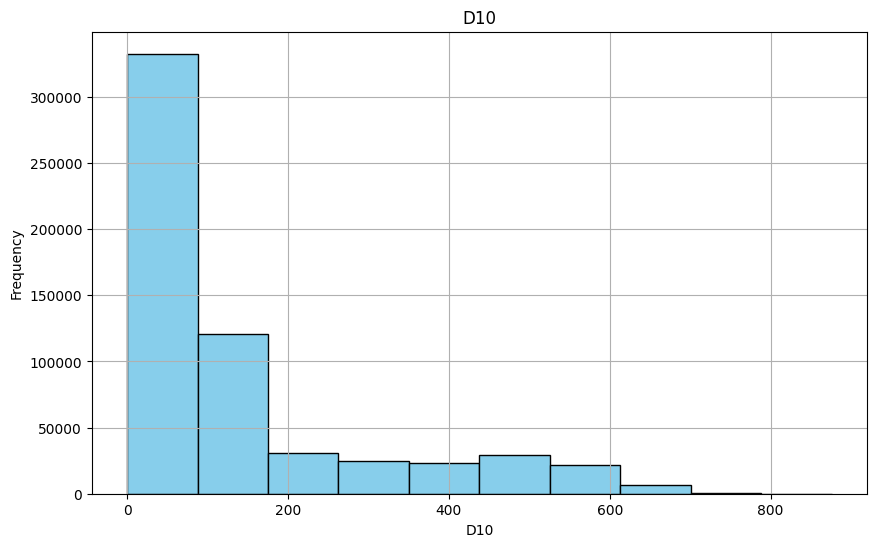

In [35]:
values = X['D10']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('D10')
plt.xlabel('D10')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Esta variable presenta una distribución aún menos dispersa que la anterior, por lo que se puede esperar una mejor representación de la variable respuesta.

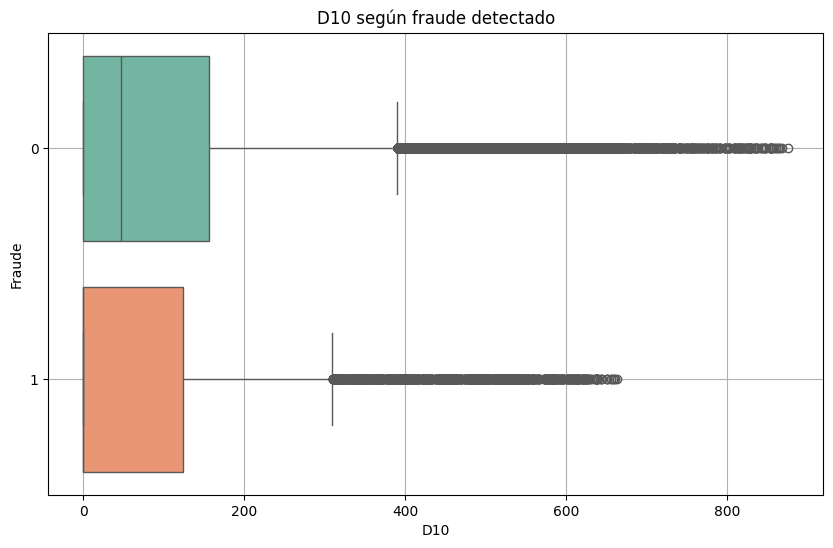

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='D10', y='isFraud', data=eda_df, palette='Set2' )
plt.title('D10 según fraude detectado')
plt.xlabel('D10')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Es evidente que la mediana de las transacciones lícitas es mayor a aquella de las ilícitas, mientras que los datos atípicos se extienden a un mayor rango.

### `D15`

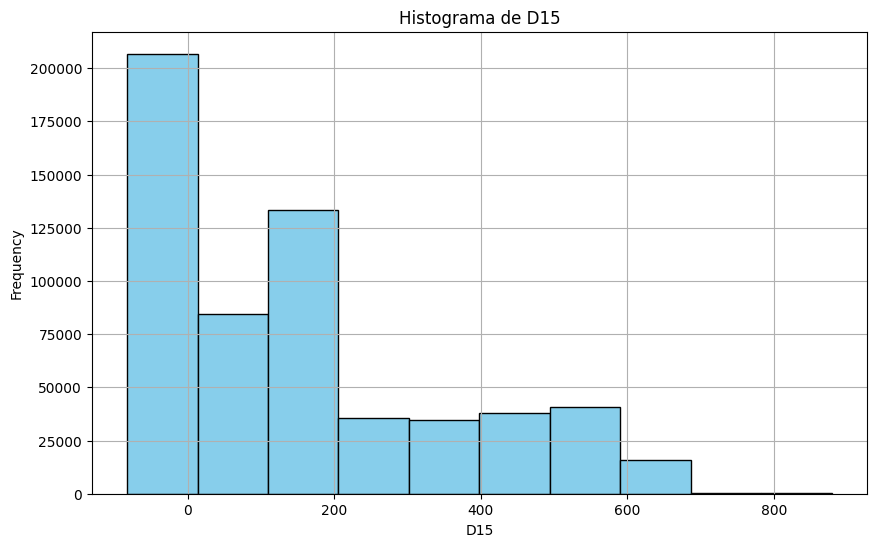

In [37]:
values = X['D15']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de D15')
plt.xlabel('D15')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Esta variable comparte comportamiento con la variable anterior, presentando aún menos dispersión de los datos.

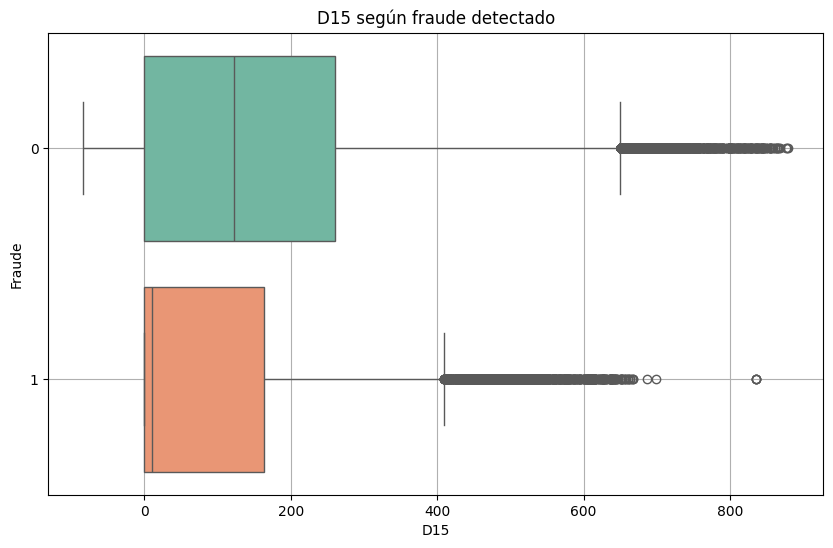

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='D15', y='isFraud', data=eda_df, palette='Set2' )
plt.title('D15 según fraude detectado')
plt.xlabel('D15')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

De la misma forma, hay una diferencia marcada en la mediana para ambas categorías.

### `V100`

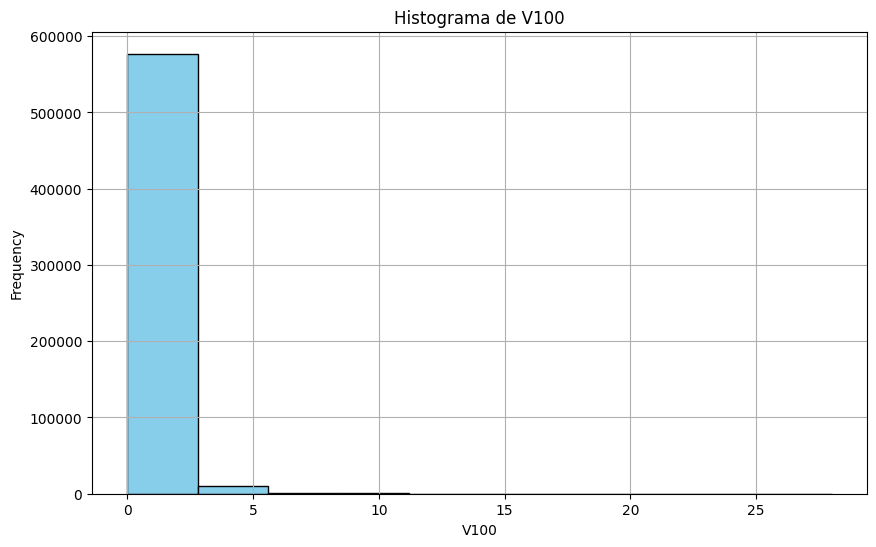

In [39]:
values = X['V100']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de V100')
plt.xlabel('V100')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Por otro lado, esta variable presenta un comportamiento similar a las primeras variables, donde se espera una gran cantidad de datos atípicos.

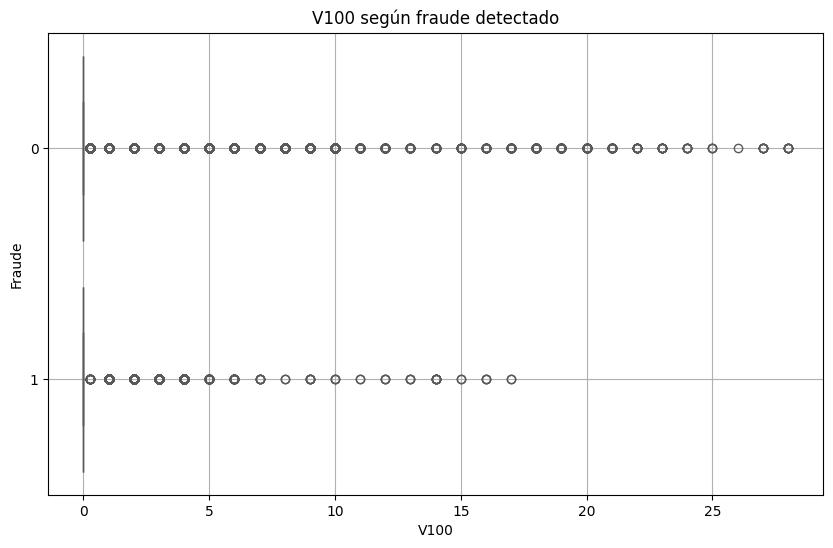

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='V100', y='isFraud', data=eda_df, palette='Set2' )
plt.title('V100 según fraude detectado')
plt.xlabel('V100')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Aún así, esta variable presenta una ligera diferencia para la variable categórica, dado que los datos atípicos ( o mayores a 0 ), se extienden más para las transacciones lícitas

### `V131`

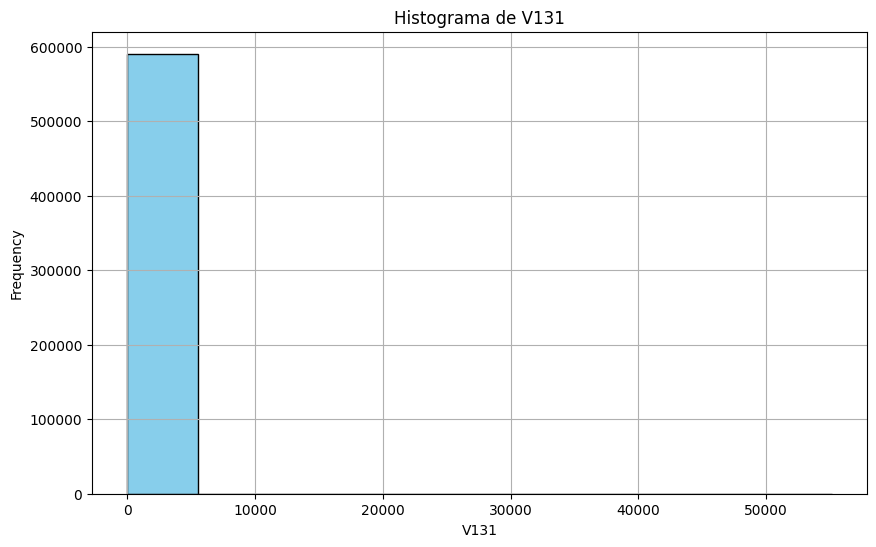

In [41]:
values = X['V131']

plt.figure(figsize=(10, 6))
plt.hist(values, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de V131')
plt.xlabel('V131')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Esta variable presenta el mismo comportamiento a la primera variable, donde no son evidentes valores por fuera de un intervalo, lo que implica que hay valores atípicos extremadamente grandes.

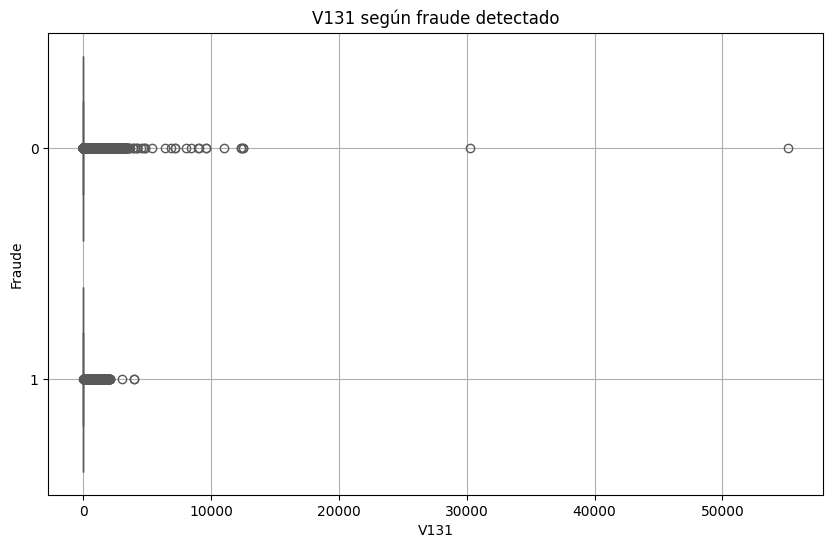

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='V131', y='isFraud', data=eda_df, palette='Set2' )
plt.title('V131 según fraude detectado')
plt.xlabel('V131')
plt.ylabel('Fraude')
plt.grid(True)
plt.show()

Como se menciona antes, la mayoría de datos se concentran en el valor 0, teniendo unos cuantos datos atípicos más grandes en las transacciones lícitas.

### Análisis gráfico con componentes principales

El siguiente gráfico compara las diferencias entre las transacciones fraudulentas y las lícitas mediante las dos primeras componentes principales. Recordemos que estas dos son las que representan un mayor porcentaje de variabilidad con respecto al conjunto de datos original.

In [43]:
X

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,C1,C3,C5,D1,D10,D15,V135,V131,V130,V12,V104,V101,V100,TransactionAmt
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,14.0,13.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,68.50
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,29.00
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,315.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,59.00
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,112.0,84.000000,111.000000,0.000000,135.0,354.000000,1.000000,0.0,1.0,4.0,50.00
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,123.982137,163.744579,0.000000,0.0,0.000000,0.559711,0.0,0.0,0.0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,29.0,56.000000,56.000000,0.000000,0.0,47.950001,2.000000,0.0,0.0,0.0,49.00
590536,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,39.50
590537,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,30.95
590538,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,22.000000,22.000000,0.000000,117.0,117.000000,1.000000,0.0,0.0,1.0,117.00


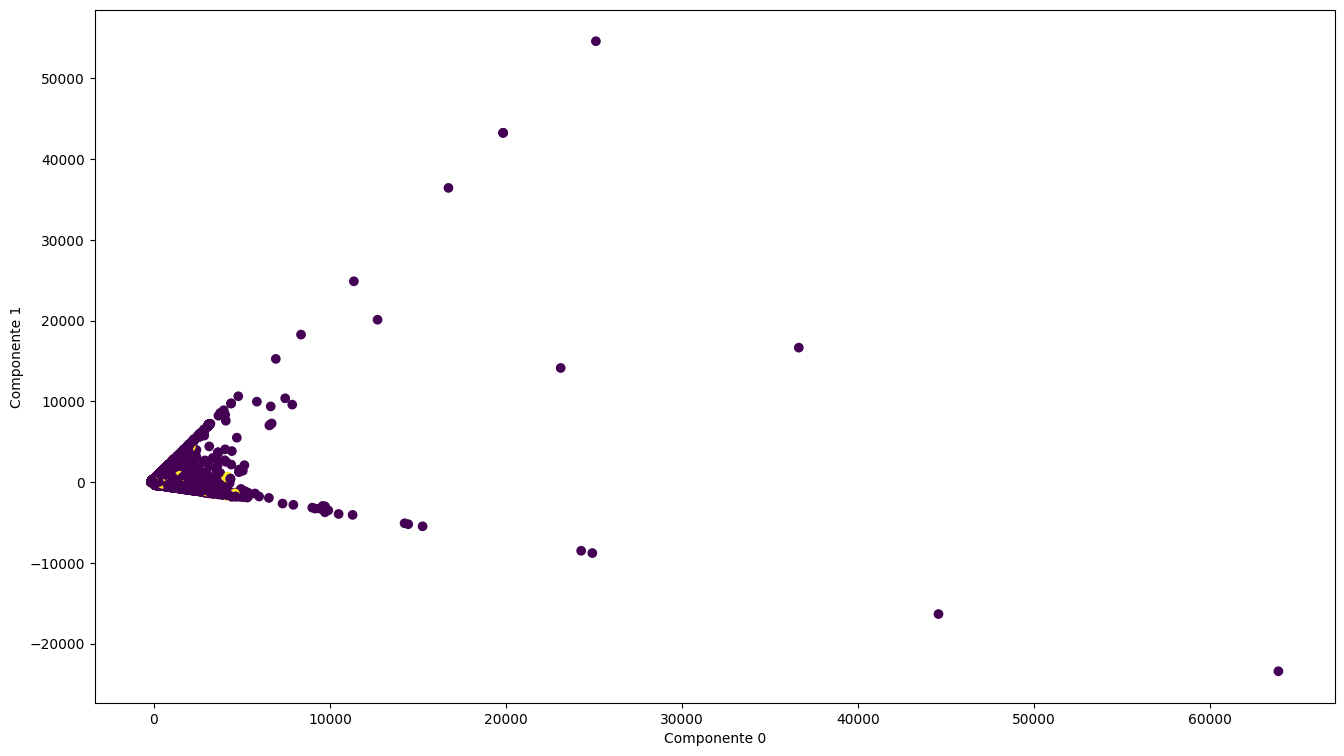

In [44]:

with open( root + "ClassPCA.pkl", 'rb' ) as f:
    X_pca, _, y_pca, _ = load(f)

plt.figure(figsize=(16, 9))

plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y_pca)

plt.xlabel('Componente 0')
plt.ylabel('Componente 1')

plt.show()

Como se puede ver en la gráfica, ambas clases se encuentran muy cercanas entre sí, por lo que es evidente que se requiere un aumento de dimensionalidad para encontrar una partición clara entre las clases.

# Parte 3: Modelos de clasificación

En primer lugar, para evitar fuga de información, se separará un conjunto de prueba, dado el uso de ADASYN

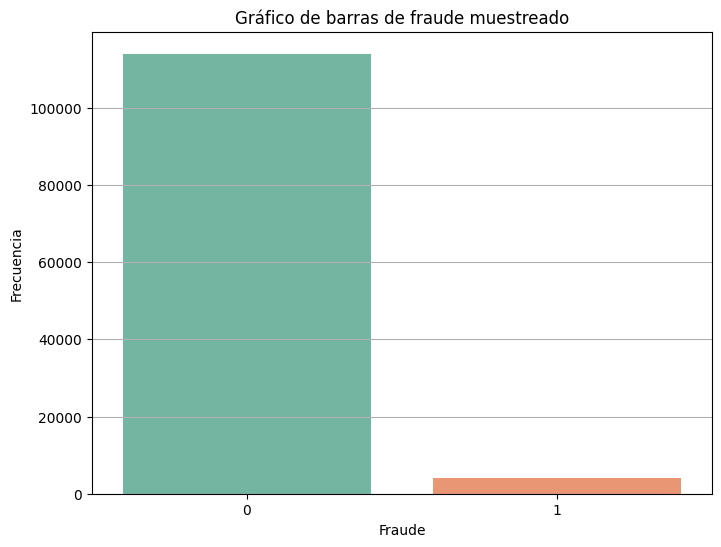

In [45]:
from sklearn.model_selection import train_test_split

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 37 )

y_df = pd.DataFrame(y_test, columns=['isFraud'])

value_counts = y_df['isFraud'].value_counts()

value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=value_counts_df, palette='Set2')
plt.title('Gráfico de barras de fraude muestreado')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')
plt.show()

Como se puede ver, el conjunto de testeo mantiene la proporción antes mencionada de 97-3. Ahora bien, se realizarán los modelos con y sin rebalanceamiento ADASYN. Podemos visualizar la nueva variable dependiente balanceada con la siguiente gráfica:

In [47]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN( random_state = 37 )

X_bal, y_bal = adasyn.fit_resample( X_train, y_train )

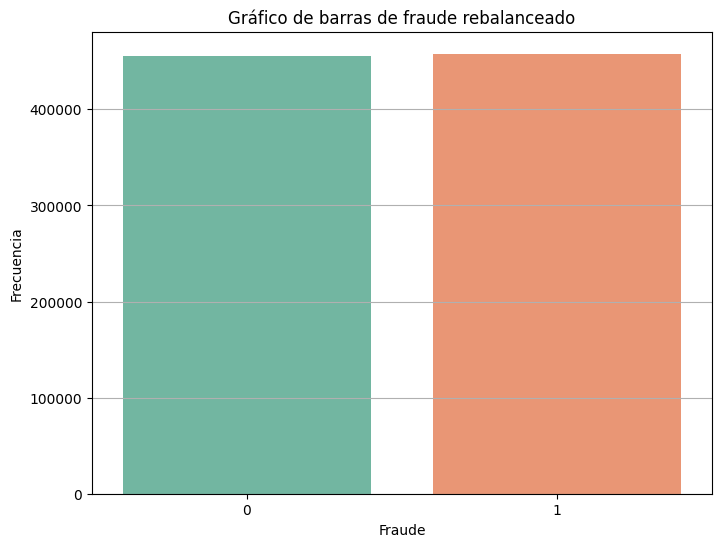

In [48]:
y_df = pd.DataFrame(y_bal, columns=['isFraud'])

value_counts = y_df['isFraud'].value_counts()

value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=value_counts_df, palette='Set2')
plt.title('Gráfico de barras de fraude rebalanceado')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import newaxis, argsort

def evaluate_model(model, X_test, y_test, time):
    
    y_pred = model.predict(X_test)

    if not set(y_pred).issubset({0, 1}):
        raise ValueError("Predictions contain values other than 0 and 1")
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    return {
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'AUC': auc,
        'CPU time': time
    }


def plot_roc_curve(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Curva ROC(area = {roc_auc_score(y_test, y_proba)})' )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Porcentaje de Falsos Positivos')
    plt.ylabel('Porcentaje de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, newaxis] * 100
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, cmap="Blues", fmt=".2f", cbar=False, annot_kws={"size": 14})
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.title('Matriz de confusión')
    plt.show()

with open( root + "ClassFinal.pkl", 'rb' ) as f:
    _, X_test, _, y_test = load(f)

X_test = X_test.copy()
y_test = y_test.copy()

In [67]:
indexes = []
results = []

### Random Forest

Teniendo en cuenta que los modelos solo se entrenaron cun una base de datos balanceada, se compara con el mejor modelo pasado, que fue el modelo Random Forest.

In [51]:
with open( root + 'RandomForestModel.pkl', 'rb' ) as f:
    RForest = load( f )

In [52]:
DataFrame( [RForest['model'].best_params_], index = ['Random Forest'] )

,max_depth,n_estimators
Random Forest,8,168


In [68]:
result = evaluate_model( RForest['model'], X_test, y_test, RForest['time'] )
indexes.append( 'Random Forest' )
results.append( result )
DataFrame( [result], index = ['Random Forest'] )

,Precision,Recall,F1,AUC,CPU time
Random Forest,0.081128,0.72371,0.1459,0.714166,35838.919434


En comparación al resultado anterior, el modelo obtuvo un desempeño menor, esto se puede deber al hecho que para esta entrega se usó un muestreo más pequeño del conjunto de datos, así como tambien cabe incluir la adición del PCA, lo que disminuye aún más la información disponible para el modelo. A continuación podemos ver qué componentes tuvieron mayor importancia sobre la decisión del modelo.

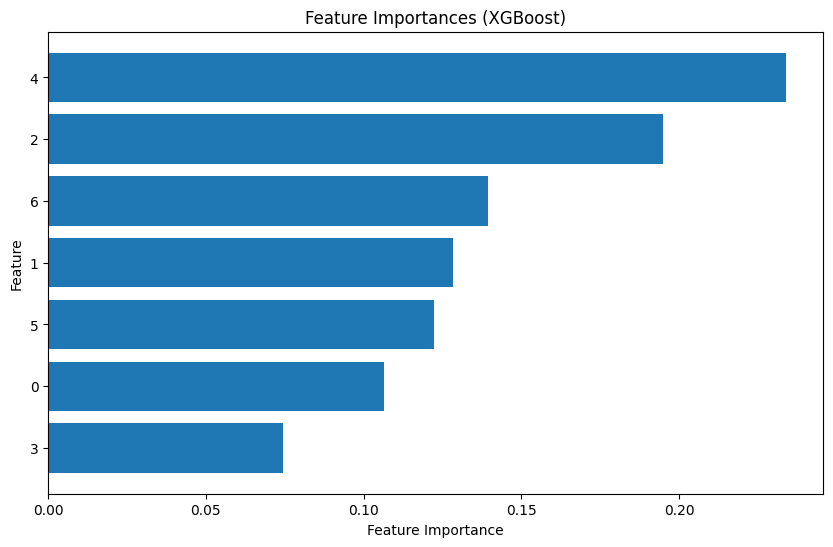

In [ ]:
feature_importances = RForest['model'].best_estimator_.feature_importances_
sorted_indices = argsort(feature_importances)
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

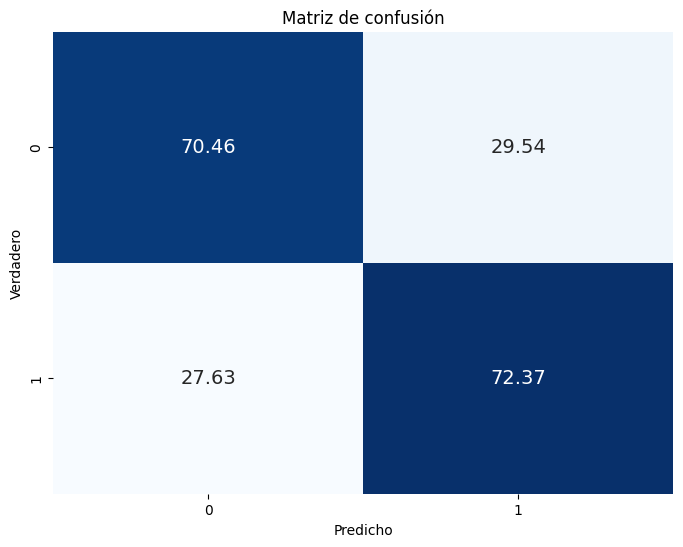

In [ ]:
plot_confusion_matrix( RForest['model'], X_test, y_test )

Podemos ver que mantiene un resultado similar al anterior, manteniendo un balance entre los aciertos de ambas categorías.

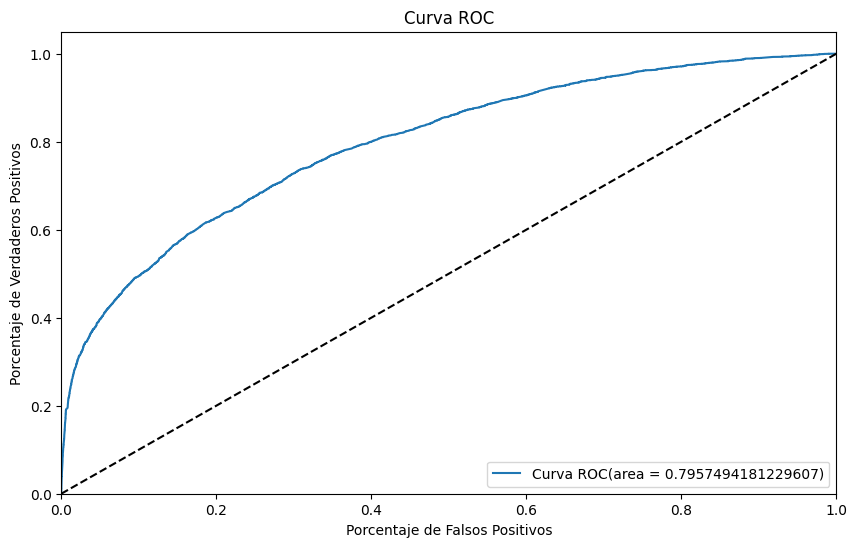

In [ ]:
plot_roc_curve( RForest['model'], X_test, y_test )

### SVM: Kernel Lineal

In [59]:
with open( root + 'linear.pkl', 'rb' ) as f:
    svm_lineal = load( f )

In [60]:
DataFrame( [svm_lineal['model'].best_params_], index = ['SVR Lineal'] )

,classifier__C,classifier__gamma
SVR Lineal,0.0001,489.974235


In [69]:
result = evaluate_model( svm_lineal['model'], X_test, y_test, svm_lineal['time'] )
indexes.append( 'Kernel Lineal' )
results.append( result )
DataFrame( [result], index = ['Kernel Lineal'] )

,Precision,Recall,F1,AUC,CPU time
Kernel Lineal,0.041454,0.924781,0.079352,0.57711,60453.900503


Podemos ver la matriz de confusión a continuación.

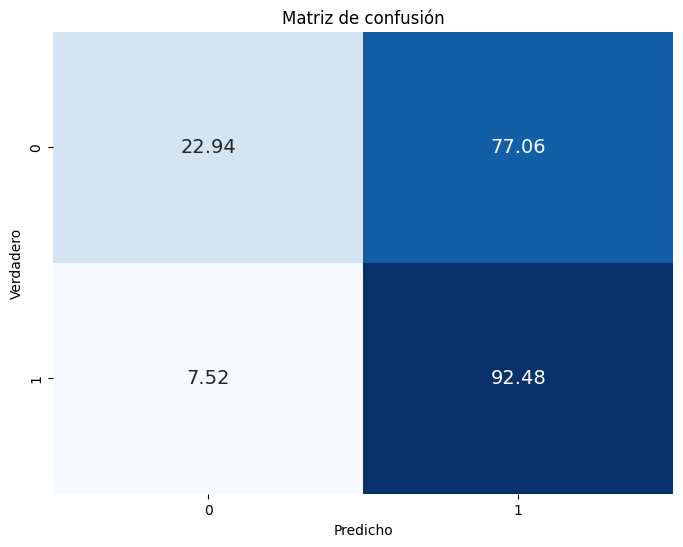

In [ ]:
plot_confusion_matrix( svm_lineal['model'], X_test, y_test )

Como se previó en la grafica de componentes principales, es evidente que al modelo le costó separar ambas clases entre sí, evidenciando el excesivo desbalance entre ambas clases. Aún así, teniendo en cuenta la naturaleza del problema, puede ser usado como un filtro inicial, para detectar fraudes, ya que ha sido el modelo con el mejor recall entre todos.

### Kernel Sigmoide

In [62]:
with open( root + 'sigmoid.pkl', 'rb' ) as f:
    svm_sigmoid = load( f )

In [63]:
DataFrame( [svm_sigmoid['model'].best_params_], index = ['SVR Sigmoide'] )

,classifier__C,classifier__gamma
SVR Sigmoide,10000.0,0.0001


In [70]:
result = evaluate_model( svm_sigmoid['model'], X_test, y_test, svm_sigmoid['time'] )
indexes.append( 'Kernel Sigmoide' )
results.append( result )
DataFrame( [result], index = ['Kernel Sigmoide'] )

,Precision,Recall,F1,AUC,CPU time
Kernel Sigmoide,0.043406,0.87926,0.082728,0.590498,187795.814687


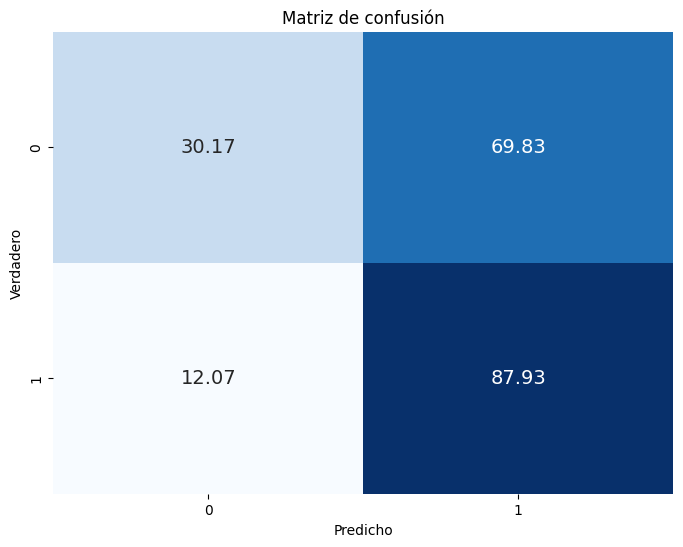

In [75]:
plot_confusion_matrix( svm_sigmoid['model'], X_test, y_test )

Podemos ver en las dos gráficas que mantiene un balance ligeramente mayor que el modelo anterior, aún así, es claro que el modelo no es adecuado para clasificar certeramente ambas clases.

### Kernel RBF

In [ ]:
with open( root + 'rbf.pkl', 'rb' ) as f:
    svm_rbf = load( f )

In [ ]:
DataFrame( [svm_rbf['model'].best_params_], index = ['SVR RBF'] )

,classifier__C,classifier__gamma
SVR RBF,4567.621974,9.698384


In [72]:
result = evaluate_model( svm_rbf['model'], X_test, y_test, svm_rbf['time'] )
indexes.append( 'Kernel RBF' )
results.append( result )
DataFrame( [result], index = ['Kernel RBF'] )

,Precision,Recall,F1,AUC,CPU time
Kernel RBF,0.089526,0.691821,0.158536,0.719143,187795.814687


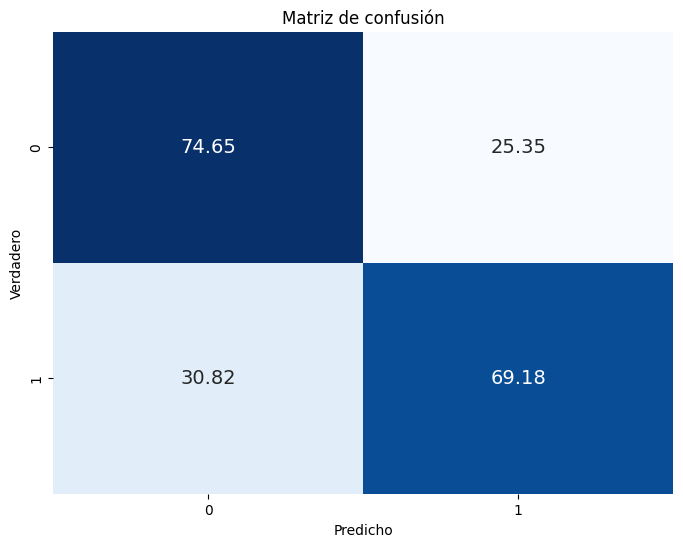

In [74]:
plot_confusion_matrix( svm_rbf['model'], X_test, y_test )

De forma similar al primer modelo, este kernel tiene un desempeño decente al momento de clasificar ambas categorías, por lo que es un modelo adecuado para el problema. Además, como se ve en el AUC, 

## Comparación de modelos

Podemos ver los resultados de todos lo modelos mediante la siguiente tabla.

In [73]:
DataFrame( results, index = indexes )

,Precision,Recall,F1,AUC,CPU time
Random Forest,0.081128,0.723710,0.145900,0.714166,35838.919434
Kernel Lineal,0.041454,0.924781,0.079352,0.577110,60453.900503
Kernel Sigmoide,0.043406,0.879260,0.082728,0.590498,187795.814687
Kernel RBF,0.089526,0.691821,0.158536,0.719143,187795.814687


Es clara la diferencia de tiempo entre los modelos, teniendo el Kernel Sigmoide y RBF exactamente el mismo tiempo de ejecución. Curiosamente, el kernel lineal tomó un tercio del tiempo, mientras que el Random Forest tomó poco más de un sexto del tiempo. Aún así, el kernel RBF supera al resto de modelos en todos los scores, aún considerando el muestreo y el PCA aplicado a los datos.